#Intro
###Dataset : teleco custumer churn 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import tkinter
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from collections import Counter

In [3]:
 raw_df = pd.read_csv('./churn.csv')

In [5]:
raw_df.head(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [6]:
raw_df.shape

(7043, 21)

In [7]:
raw_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##Notes:
#####- comme par hasard on a 7043 lignes, aucune contient des valeurs manquantes(nan,null)
#####- par la suite ,on va decouvrir s'il ya des valeurs aberrantes
#####- on 21 columns, la 21 eme est a predire "Churn"
#####- 20 columns sont des features dont la majorité sont categoriels
#####- total charges est codé en mode string bien que c'est une variable numerique

In [14]:
for i in raw_df.columns:
  print(i,raw_df[i].unique())



customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

0

In [31]:
import re

def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False


print(raw_df['MonthlyCharges'].isna().sum())
TC_non_numeric = [i for i in raw_df['TotalCharges'] if isfloat(i) == False]
TC_non_numeric_range = [i for i in range(len(raw_df['TotalCharges'])) if isfloat(raw_df['TotalCharges'][i]) == False]
print(len(TC_non_numeric))


0
11


#####seems we have 11 non numeric in TotalCharges

In [32]:
# convert TotalCharges to numeric
raw_df = raw_df.drop(TC_non_numeric_range, axis = 0).reset_index(drop=True)


In [33]:
raw_df['TotalCharges'] = raw_df['TotalCharges'].astype(float) 

###duplicate rows?


In [35]:
df = raw_df.drop('customerID', axis=1)
print('Number of duplicated values in training dataset: ', df.duplicated().sum())

Number of duplicated values in training dataset:  22


In [36]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

Duplicated values dropped succesfully


##Data imbalance check

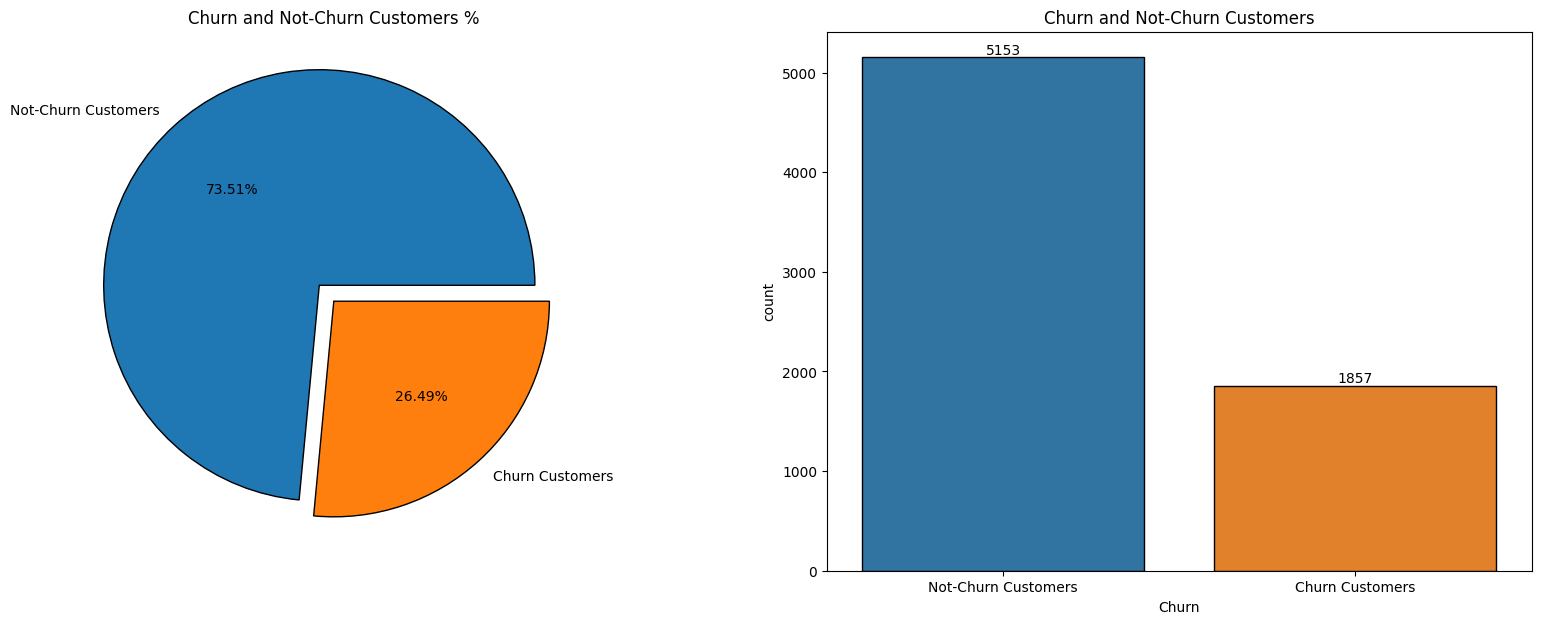

In [40]:
l1 = list(df['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Churn and Not-Churn Customers %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df, 
                   x='Churn',
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Churn and Not-Churn Customers')
plt.show()

25% churn and 75% not-churn
####les techniques possibles:
#####**stratified sampling
#####**oversampling-undersampling
#####**TOMEK Links and SMOTE

##**EXPLORATORY DATA ANALYSIS:**




### Creating numerical and categorical lists

In [57]:
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6: #parceque les experiences ont montré que lorsque le nombre de classes depasse 5 pour un feature ,il est desenvisagable de faire tree-models
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1] # Excluding 'Churn

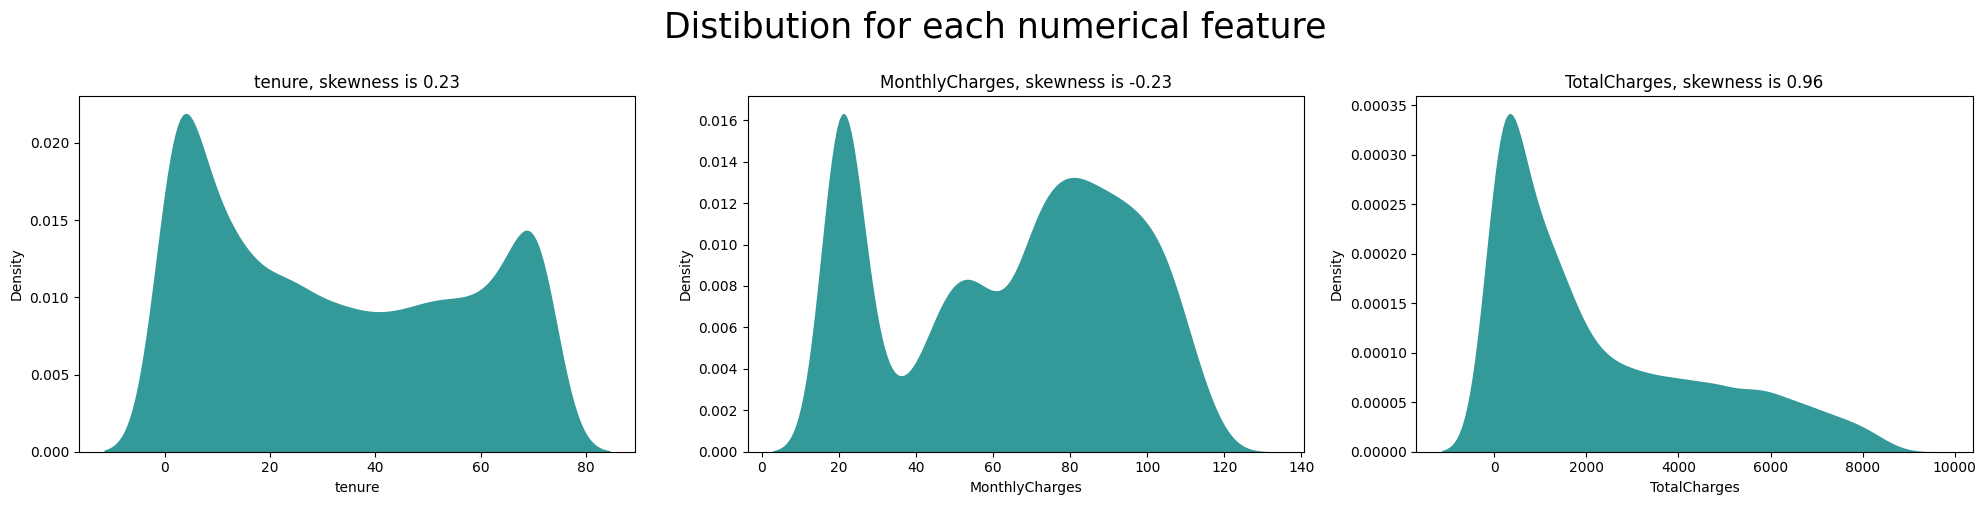

In [43]:
# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(20,5))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

dist_custom(dataset=df, columns_list=numeric_columns, rows=1, cols=3, suptitle='Distibution for each numerical feature')
plt.tight_layout()



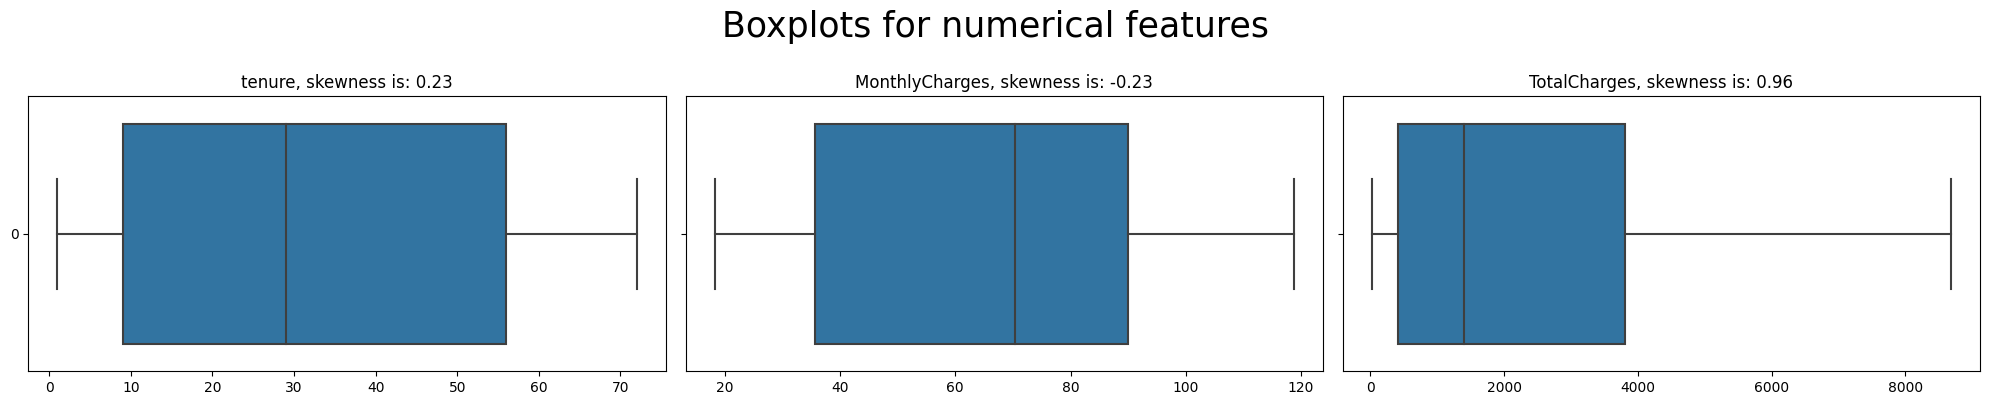

In [46]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20,4))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=1, cols=3, suptitle='Boxplots for numerical features')
plt.tight_layout()

####**the skewness is important when it comes to choose how to scale features(minmax, normalisation ,robust scaling)**
####TotalCharges is left-skewed(obviously it is not symmetric so it doesn't follow the guassian distribution
#### whereas the other variables are alright but also don't follow normal distribution , however it doesn't great problem

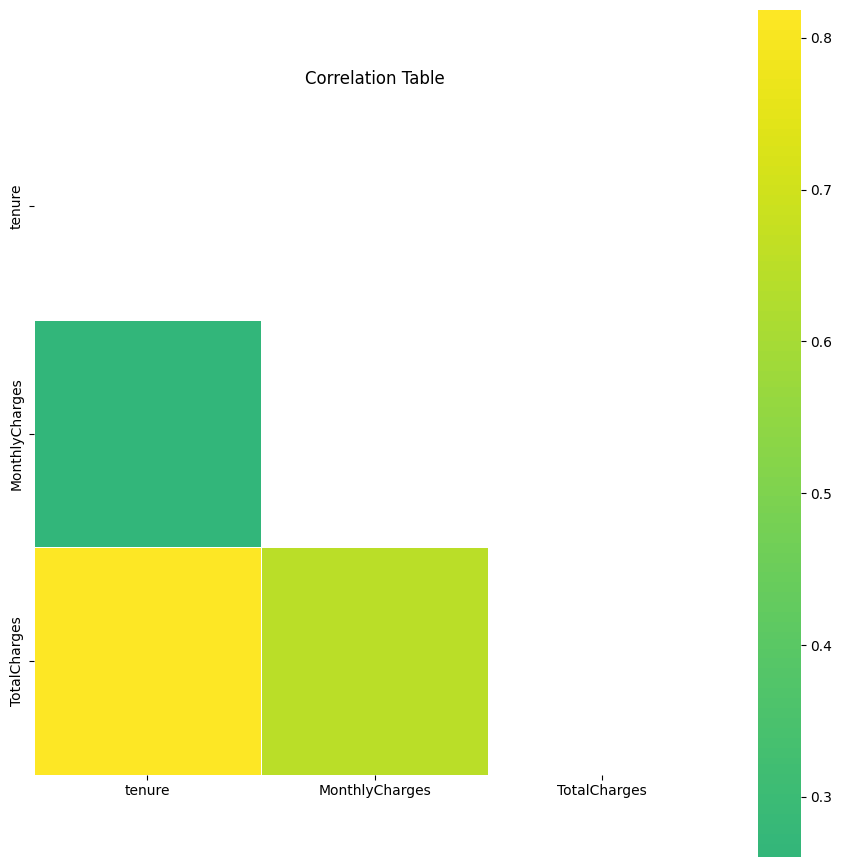

In [50]:
plt.figure(figsize = (11,11))
corr = df[numeric_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0,square = True, cmap="viridis",linewidths = .6)
plt.title('Correlation Table')
plt.show()

### it's obvious to see how  tenure and totalcharges are corrleated to each other (lol)

In [63]:
# Label Encoding refers to converting the labels into a numeric form. 
# This is only for EDA reasons. Later we will use OneHotEncoder to prepare for model building.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1 = df.copy()

df1[categoric_columns] = df1[categoric_columns].apply(le.fit_transform)
df1[['Churn']] = df1[['Churn']].apply(le.fit_transform)

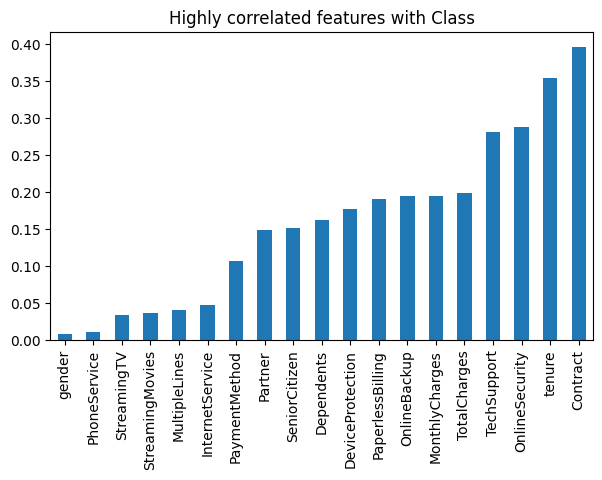

In [65]:
plt.figure(figsize=(7,4))
d = df1.corr()['Churn'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')


### before we dig further , we must check if there is some of outliers in order to have well-builded hypothesis
#### to do so : we have some of techniques like:
#### isolated forest, Tukey’s method(good for small datasets ...)

In [66]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [67]:
# Detecting and dropping outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


#### heureusement (lol)

In [68]:
#This function takes dataframe , 1:4 columns ,hue and palette then visualize seaborn countplots
def count_group(df,cols,set_hue=None,set_palette=None):
    colors=['red','green','blue','yellow']
    fig , ax = plt.subplots(1,len(cols),figsize=(7*len(cols),6))
    for i , col in enumerate(cols):
        sns.countplot(
                      data=df
                      ,x=col
                      ,ax=ax[i]
                      ,color=colors[i]
                      ,hue=set_hue
                      ,palette=set_palette)
        ax[i].set_title(f'{col} Count Plot')

    plt.show()

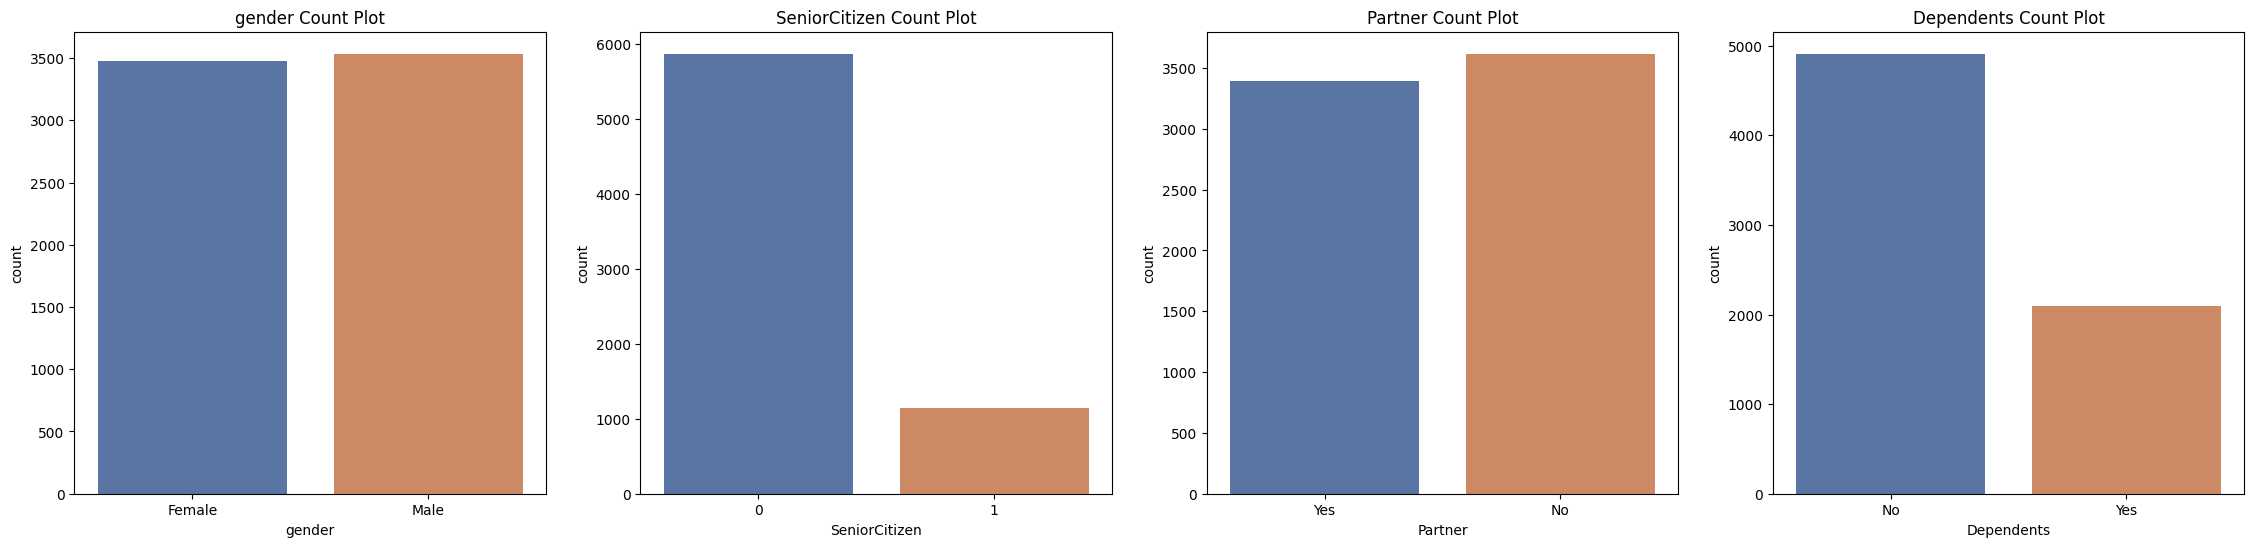

In [79]:
count_group(df,['gender','SeniorCitizen','Partner','Dependents'],set_palette='deep')

**1. About half of the customers in our data set are males while the other half are females.

Only 16.2% are Seniors.
Only 30% have Dependents.
About half of the customers have Partners (48.3%)**
at least we can judge independately on sex and partnership

In [74]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def pie_group(df,cols,title=' '):
    fig = make_subplots(
        rows=1
        ,cols=3
        ,subplot_titles=(cols[0],cols[1],cols[2])
        ,specs=[[{'type':'domain'},{'type':'domain'}, {'type':'domain'}]])
    
    for i,col in enumerate(cols):
        fig.add_trace(
            go.Pie(
            labels=df[col].value_counts().index
            ,values=df[col].value_counts().values
            ,textinfo='label+percent'
            ,insidetextorientation='radial'
            )
                      ,row=1
                      ,col=1+i
                     )

    fig.update(layout_showlegend=True)
    fig.update_layout(height=400, width=1200, title_text=title)
    fig.show()

In [108]:
pie_group(df,['Contract','PaperlessBilling','PaymentMethod'],'Customer account information')

**55% have chosed the month-to-month option**
**59.3 pay with digital ways**


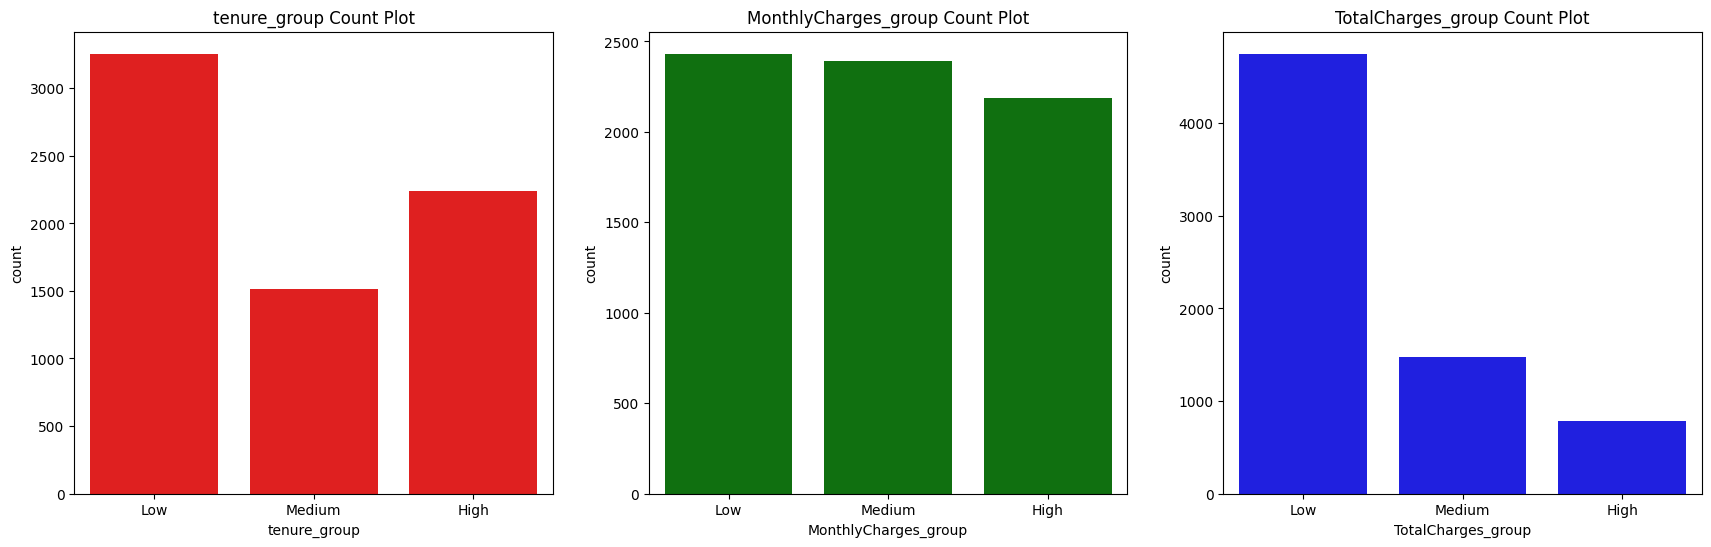

In [94]:

df2 = df.copy()
df2['tenure_group']=pd.cut(df2['tenure'],bins=[-1,25,48,73],labels=['Low','Medium','High'])
df2['MonthlyCharges_group']=pd.cut(df2['MonthlyCharges'],bins=[18,52,85,119],labels=['Low','Medium','High'])
df2['TotalCharges_group']=pd.cut(df2['TotalCharges'],bins=[0,2895,5790,8685],labels=['Low','Medium','High'])
count_group(df2,['tenure_group','MonthlyCharges_group','TotalCharges_group'])


**about 46.7% are recent customers.

High, low, and medium monthly charges each represent about a third of the customer base.
67.8% of the customers pay low charges in total. Maybe there is a correlation between high monthly charges and churn.****

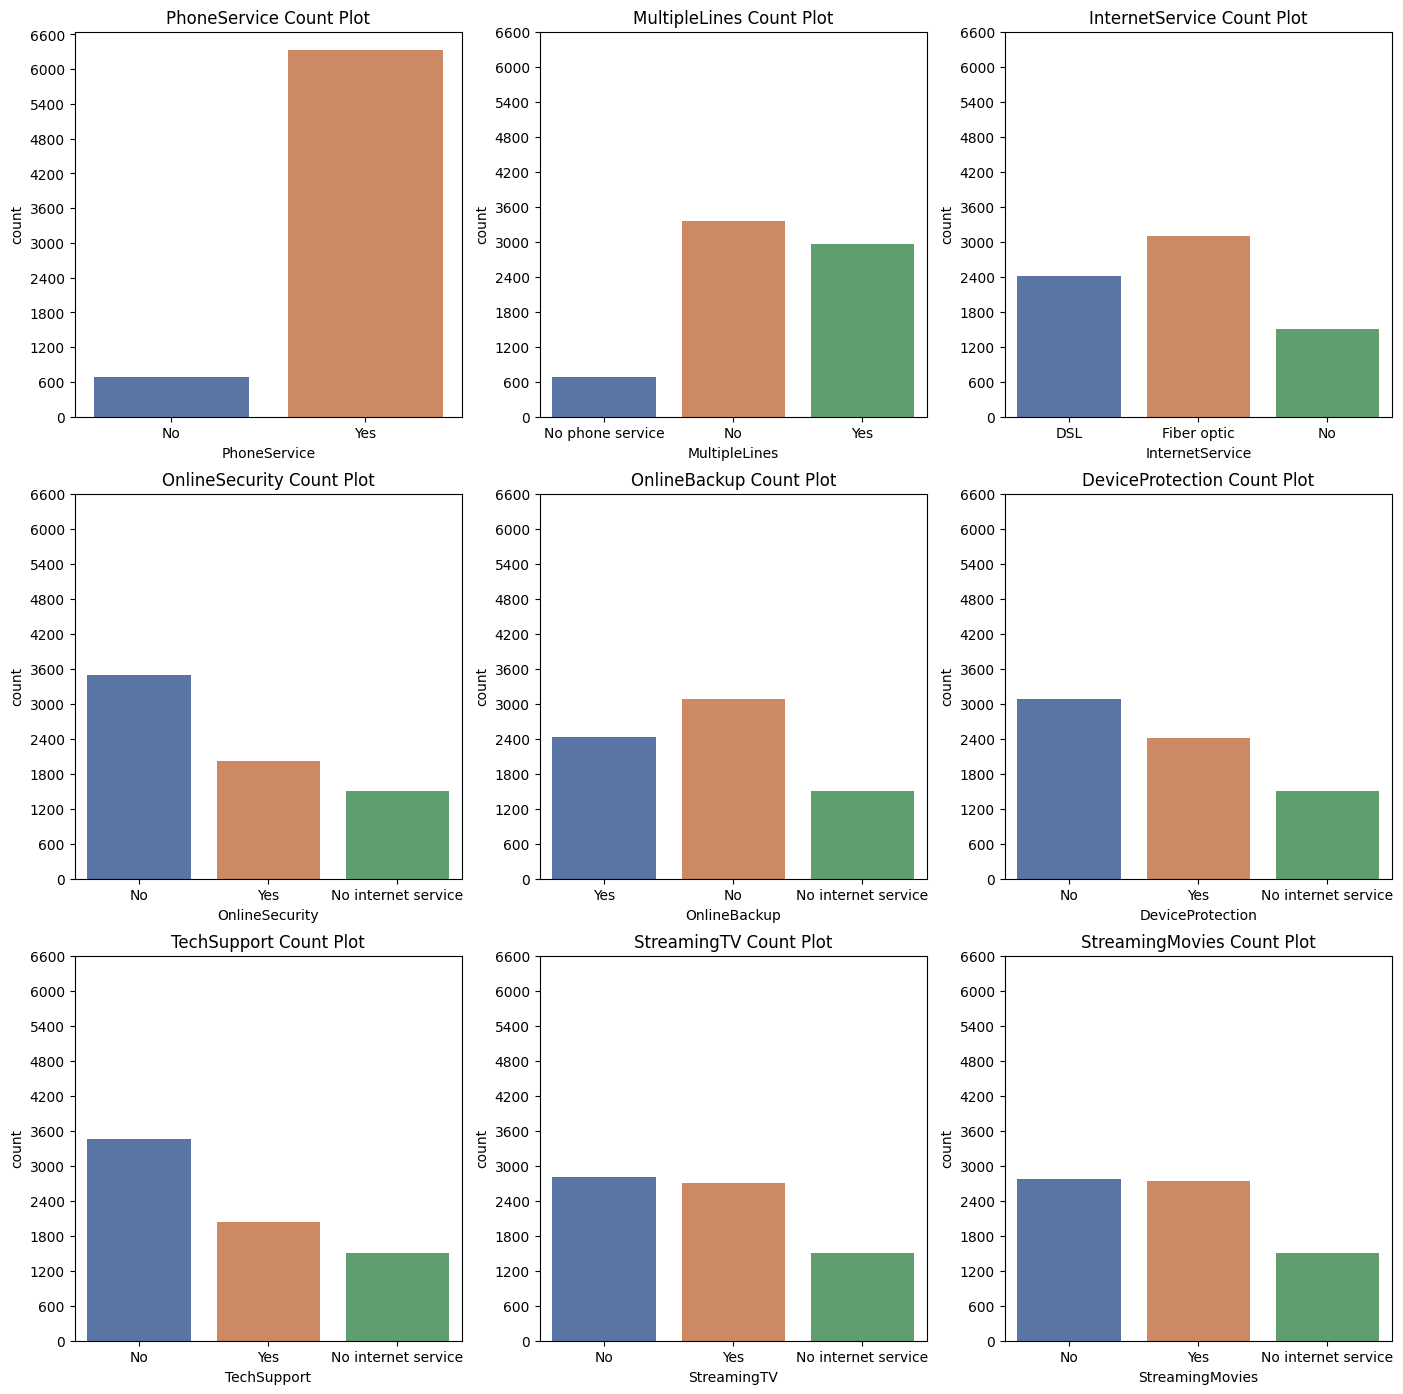

In [96]:
# Services that each customer has signed up for

cols = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig , ax = plt.subplots(3,3,figsize=(17,17))
for i , col in enumerate(cols):
        sns.countplot(
                      data=df
                      ,x=col
                      ,ax=ax[i//3,i%3]
                      ,palette='deep'
                      )
        ax[i//3,i%3].set_title(f'{col} Count Plot')
        ax[i//3,i%3].set_yticks(range(0, df.shape[0], 600))

plt.show()

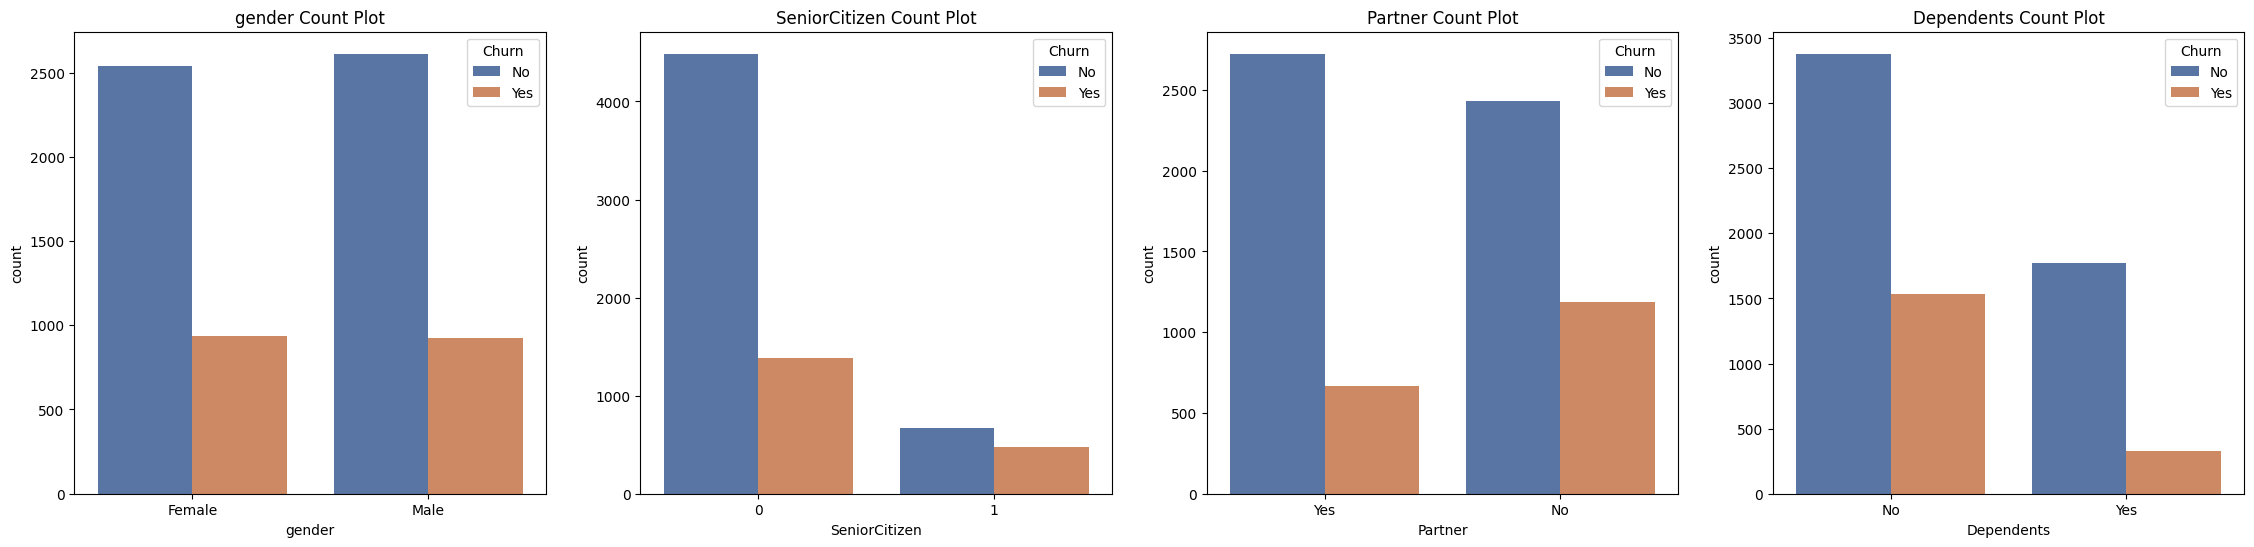

In [97]:
count_group(df,['gender','SeniorCitizen','Partner','Dependents'],set_hue='Churn',set_palette='deep') #nothing special in the results

In [104]:
# Here we transform churn to numeric values
df['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df['Churn'].replace(to_replace = 'No',  value = 0, inplace = True)
churn = df[df.Churn== 1]
no_churn = df[df.Churn==0]

In [105]:
cols = ['PhoneService','MultipleLines','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
perc_churn = []
perc_no_churn=[]
for col in cols:
    x = churn[col].value_counts(normalize=True)['Yes'].round(3)*100
    perc_churn.append(x)
    x= no_churn[col].value_counts(normalize=True)['Yes'].round(3)*100
    perc_no_churn.append(x)
    

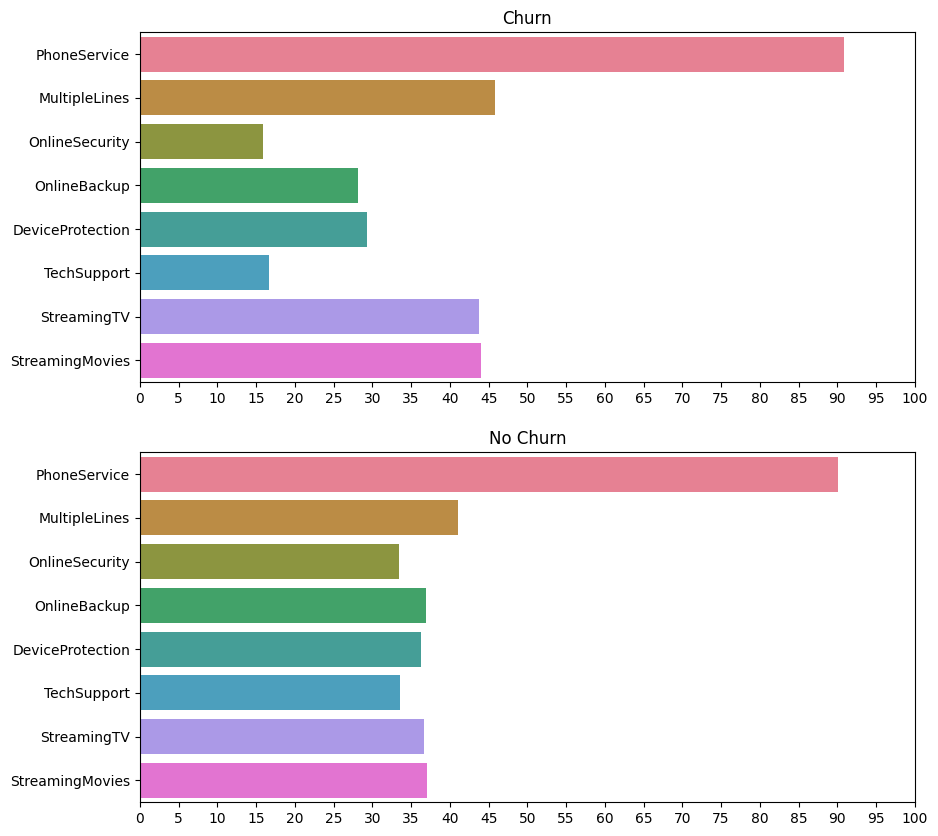

In [106]:
fig,ax=plt.subplots(2,1,figsize=(10,10))
sns.barplot(y=cols,x=perc_churn,orient='h',ax=ax[0],palette='husl');
sns.barplot(y=cols,x=perc_no_churn,orient='h',ax=ax[1],palette='husl');
ax[0].set_title('Churn')
ax[1].set_title('No Churn')
ax[0].set_xticks(range(0, 101, 5))
ax[1].set_xticks(range(0, 101, 5))
fig.show()

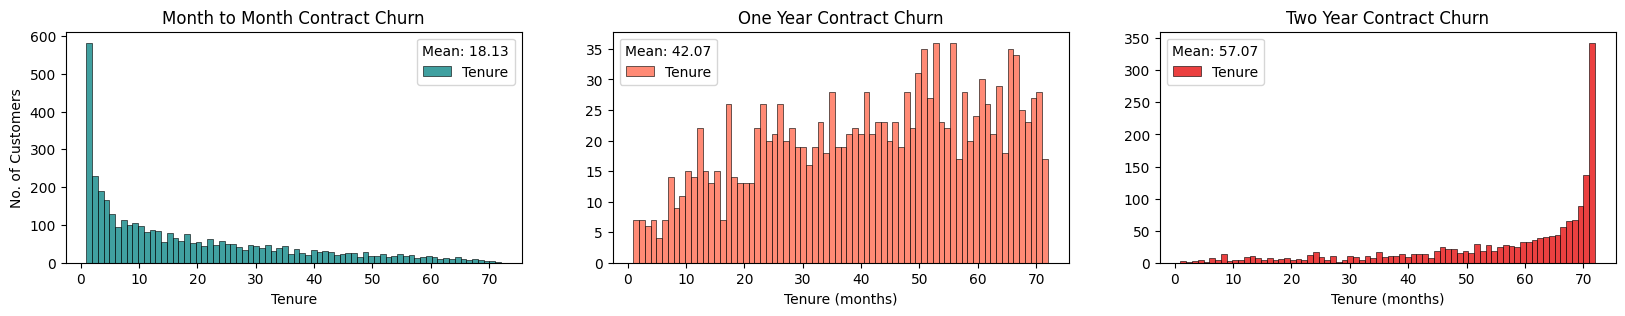

In [107]:
two_year_mean = round(df1[df1['Contract']==2]['tenure'].mean(),2)
month_mean = round(df1[df1['Contract']==0]['tenure'].mean(),2)
year_mean = round(df1[df1['Contract']==1]['tenure'].mean(),2)

fig = plt.subplots(nrows=1, ncols=3, figsize = (20,3))

plt.subplot(1,3,1)
ax = sns.histplot(df1[df1['Contract']==0]['tenure'], bins=72, color = '#008080')
ax.legend(['Tenure'],loc='upper right', title=(f'Mean: {month_mean}'))
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Month to Month Contract Churn')

plt.subplot(1,3,2)
ax = sns.histplot(df1[df1['Contract']==1]['tenure'], bins=72, color = '#FF6347')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract Churn')

plt.subplot(1,3,3)
ax = sns.histplot(df1[df1['Contract']==2]['tenure'], bins=72, color = '#E50000')
ax.legend(['Tenure'],loc='upper left', title=(f'Mean: {two_year_mean}'))
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract Churn')

plt.show()

In [110]:
# this function takes from 1 to 3 features and plot their churn rates
def churn_rates(df,cols,set_hue=None):
    fig , ax = plt.subplots(1,len(cols),figsize=(7*len(cols),6))
    for i , col in enumerate(cols):
        sns.barplot(
                      data=df
                      ,x=col , y='Churn'
                      ,ax=ax[i]
                      ,hue=set_hue
                        ,ci=None)
        ax[i].set_title(f'{col} Churn Rates')
    plt.show()

<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




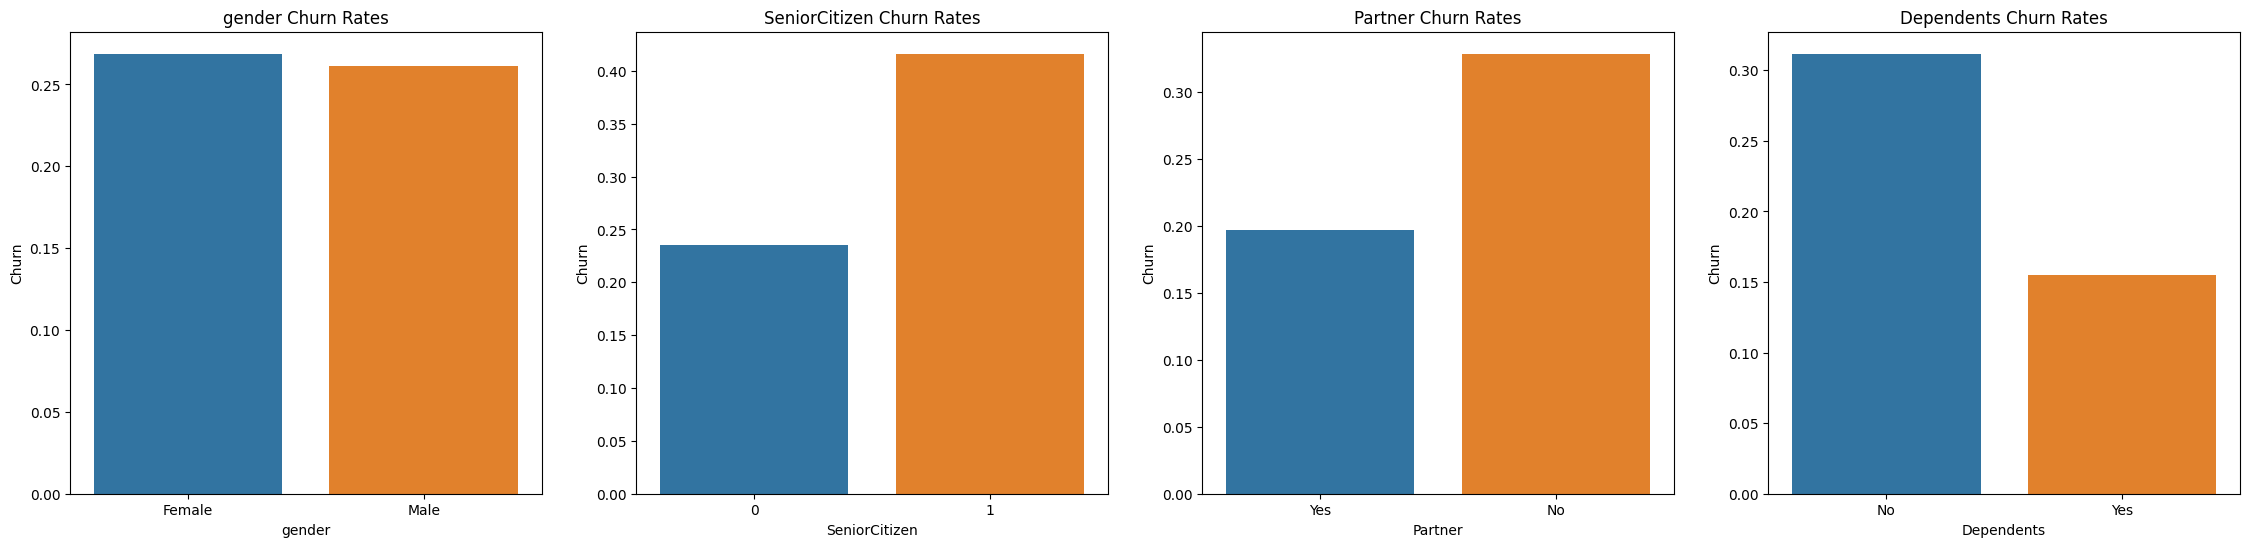

In [111]:
churn_rates(df,['gender','SeniorCitizen','Partner','Dependents'])


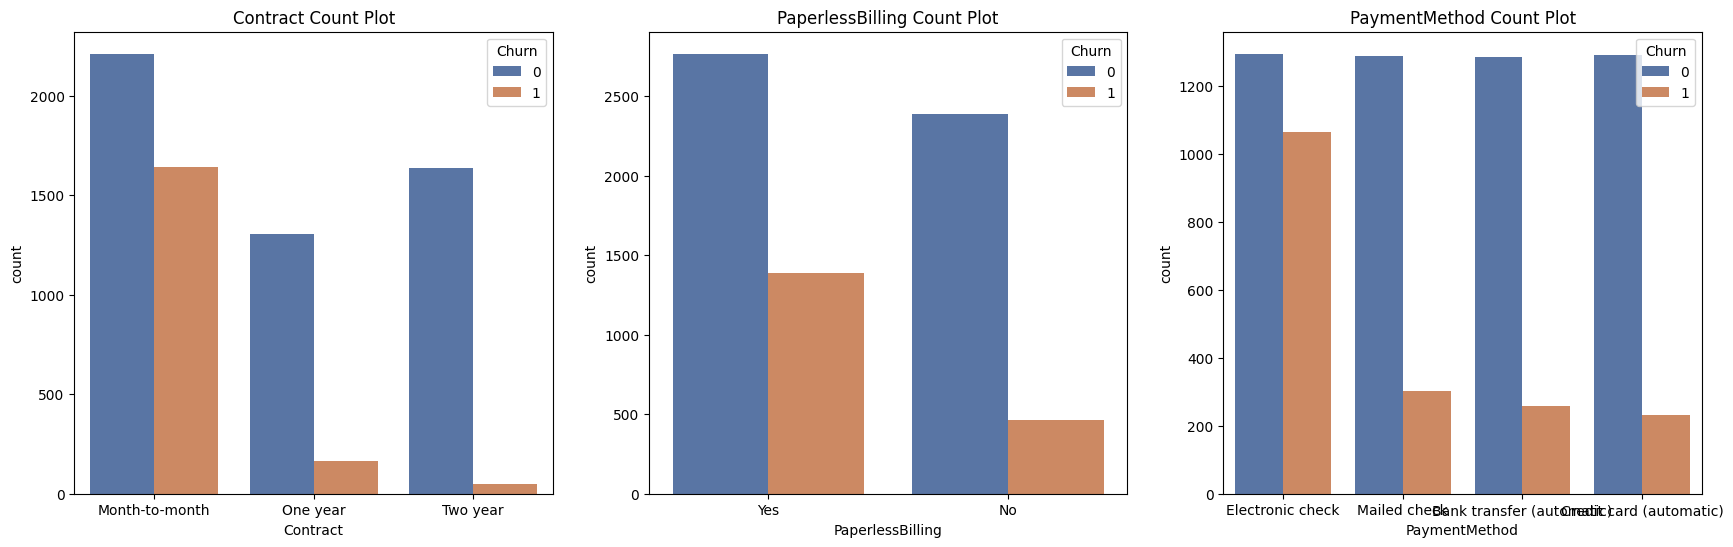

In [112]:
count_group(df,['Contract','PaperlessBilling','PaymentMethod'],set_hue='Churn',set_palette='deep')

<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




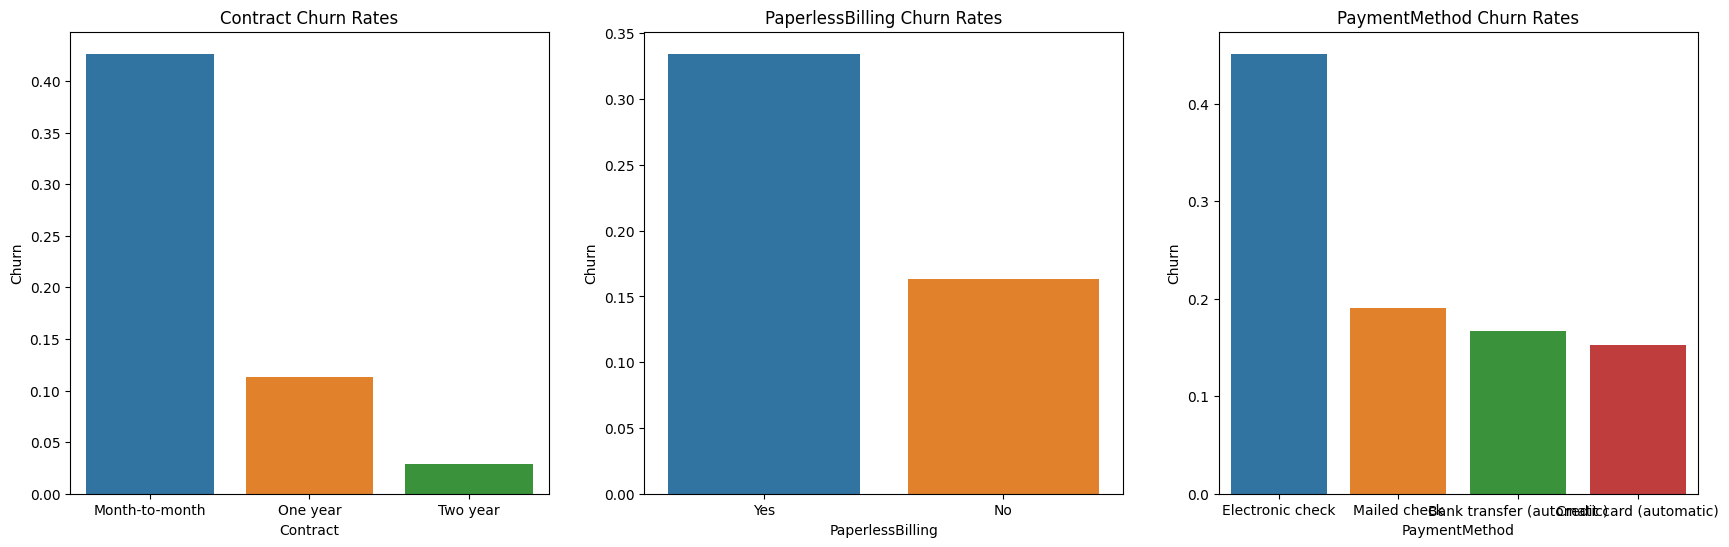

In [113]:
churn_rates(df,['Contract','PaperlessBilling','PaymentMethod'])


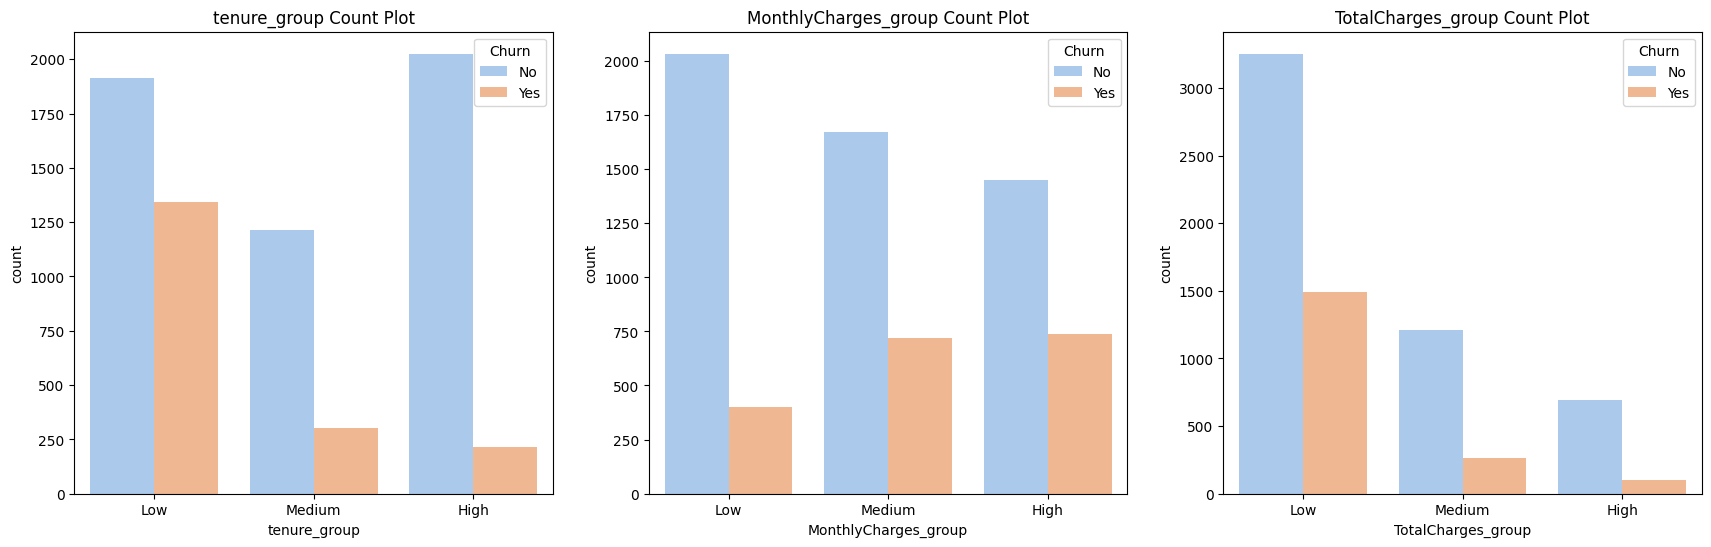

In [114]:
count_group(df2,['tenure_group','MonthlyCharges_group','TotalCharges_group'],set_hue='Churn',set_palette='pastel')

In [126]:
#This function takes one column and visualize plotly Pie chart
def pie(df,col,title):
    data=df[col].value_counts()
    fig=px.pie(data,values=data.values,names=data.index,title=f"{title} Pie Plot",width=400);
    fig.show()

In [127]:
pie(no_churn,'InternetService','InternetService with no  churn')
pie(churn,'InternetService','InternetService with churn')



<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




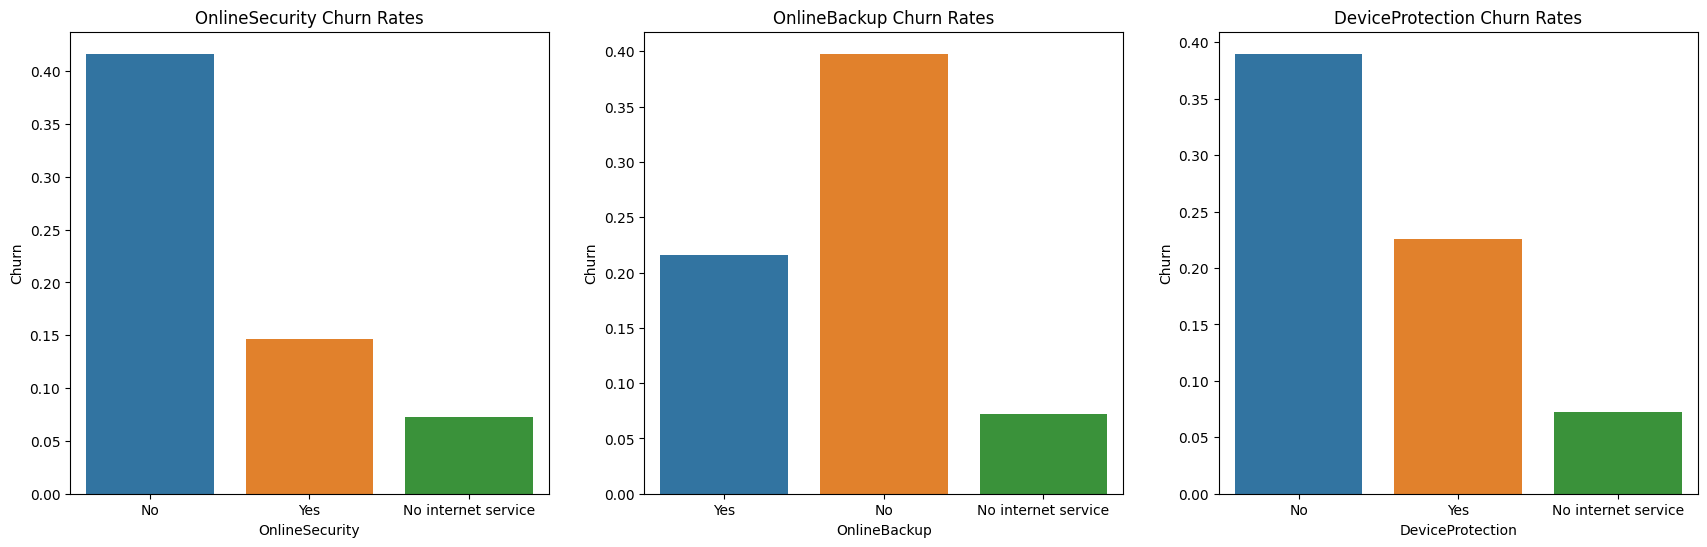

<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-110-fd3813ee64d9>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




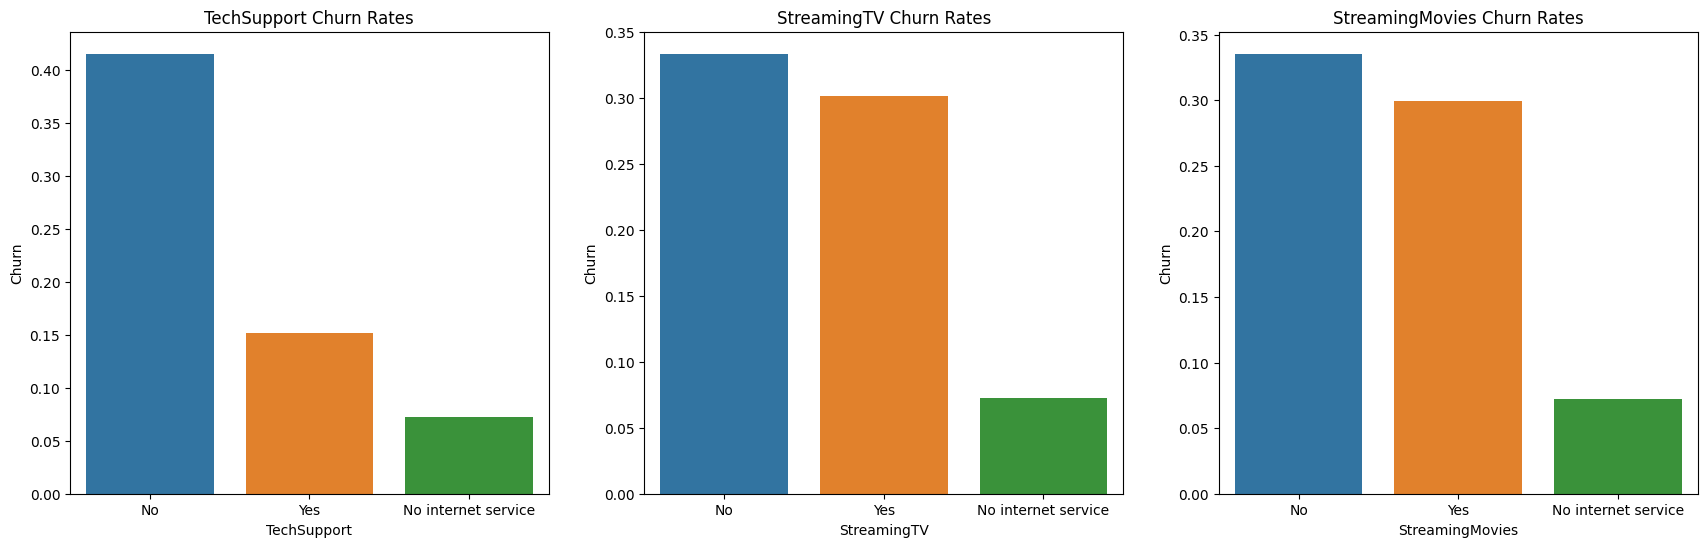

In [128]:
churn_rates(df,['OnlineSecurity','OnlineBackup','DeviceProtection'])
churn_rates(df,['TechSupport','StreamingTV','StreamingMovies'])

<ipython-input-145-3c9751c8480e>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




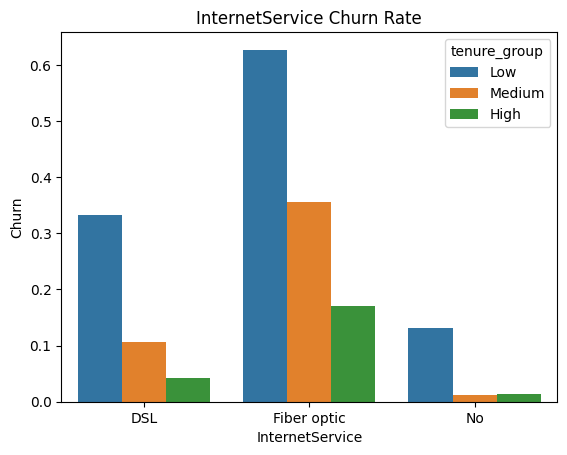

In [145]:
#This function is to show churn rate as a bar plot
df2['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
df2['Churn'].replace(to_replace = 'No',  value = 0, inplace = True)
sns.barplot(data=df2,x='InternetService',y='Churn',hue='tenure_group',ci=None)
plt.title(f'InternetService Churn Rate')
plt.show()


<ipython-input-146-a46ca3d58a95>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




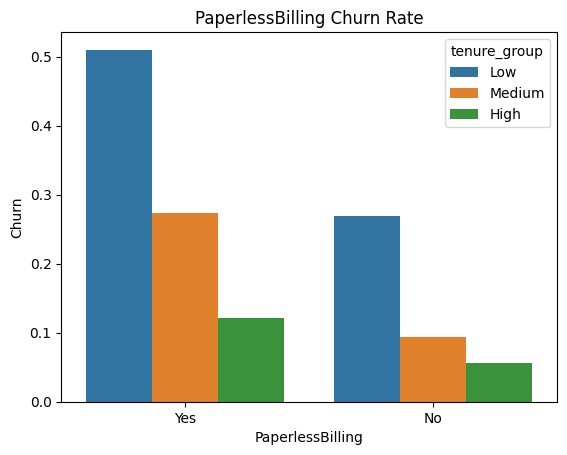

In [146]:
sns.barplot(data=df2,x='PaperlessBilling',y='Churn',hue='tenure_group',ci=None)
plt.title(f'PaperlessBilling Churn Rate')
plt.show()


<ipython-input-147-6c29cdcd84af>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




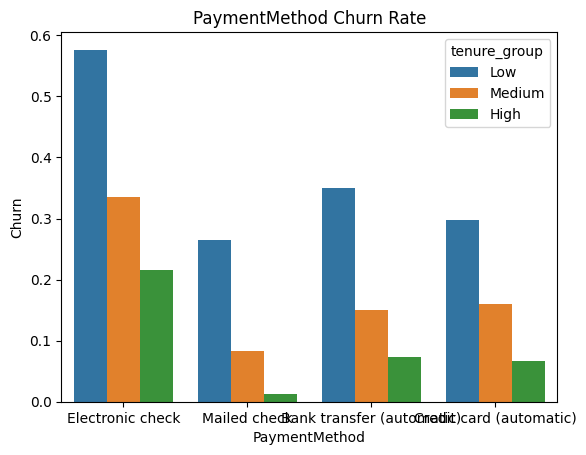

In [147]:
sns.barplot(data=df2,x='PaymentMethod',y='Churn',hue='tenure_group',ci=None)
plt.title(f'PaymentMethod Churn Rate')
plt.show()
